# Model Training

In [3]:
import numpy as np

def preprocess_data(sample):
    # 截取并调整每个样本为 (4, 240, 1)
    return np.transpose(sample[:, 0:4, 0:240], (1, 2, 0))

def normalize_data(data):
    # 将数据归一化到 [0, 1] 之间
    return data / 4.0

def data_generator(data_files, label_files, batch_size):
    while True:
        for start in range(0, len(data_files), batch_size):
            end = min(start + batch_size, len(data_files))
            batch_data = []
            batch_labels = []
            for i in range(start, end):
                sample = np.load(data_files[i])
                label = np.load(label_files[i])
                preprocessed_sample = preprocess_data(sample)
                normalized_sample = normalize_data(preprocessed_sample)
                batch_data.append(normalized_sample)
                batch_labels.append(label)
            yield np.array(batch_data), np.array(batch_labels)

In [6]:
import os
from sklearn.model_selection import train_test_split

data_dir = 'simulation/out/S1U-test/numpy_data/seq'
label_dir = 'simulation/out/S1U-test/numpy_data/label'

data_files = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npy')])
label_files = sorted([os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith('.npy')])

# 使用 train_test_split 进行数据集划分
train_data_files, val_data_files, train_label_files, val_label_files = train_test_split(
    data_files, label_files, test_size=0.2, random_state=42)

batch_size = 32
steps_per_epoch = len(train_data_files) // batch_size
validation_steps = len(val_data_files) // batch_size

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

model = get_dl_model_240()

model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

history = model.fit(
    data_generator(train_data_files, train_label_files, batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=data_generator(val_data_files, val_label_files, batch_size),
    validation_steps=validation_steps
)

Epoch 1/10


E0000 00:00:1737404128.411202  810924 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_2_1/dropout_18_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1737404129.043371  813759 cuda_dnn.cc:529] Loaded cuDNN version 90300


11795/15000 ━━━━━━━━━━━━━━━━━━━━ 6:13 117ms/step - loss: 0.4438 - sparse_categorical_accuracy: 0.8141

KeyboardInterrupt: 

In [10]:
(len(train_data_files), len(val_data_files))

(480000, 120000)

In [17]:
model240_S1U = get_dl_model_240()

model240_S1U.compile(optimizer=Adam(),
                     loss=SparseCategoricalCrossentropy(),
                     metrics=[SparseCategoricalAccuracy()])

size = len(train_data_files) // 100
steps_per_epoch = size // batch_size
validation_steps = size // batch_size

history = model240_S1U.fit(data_generator(train_data_files[:size], train_label_files[:size], batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=data_generator(val_data_files[:size], val_label_files[:size], batch_size),
    validation_steps=validation_steps)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 148ms/step - loss: 1.0082 - sparse_categorical_accuracy: 0.4859 - val_loss: 1.1216 - val_sparse_categorical_accuracy: 0.4975
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - loss: 0.5770 - sparse_categorical_accuracy: 0.7516 - val_loss: 1.3521 - val_sparse_categorical_accuracy: 0.3631
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - loss: 0.4942 - sparse_categorical_accuracy: 0.7905 - val_loss: 1.1948 - val_sparse_categorical_accuracy: 0.4358
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - loss: 0.4522 - sparse_categorical_accuracy: 0.8182 - val_loss: 0.5066 - val_sparse_categorical_accuracy: 0.7817
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - loss: 0.4369 - sparse_categorical_accuracy: 0.8149 - val_loss: 0.4195 - val_sparse_categorical_accuracy: 0.8298
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - loss: 0.4207 - sparse_categorical_accuracy: 0.8310 - val_loss: 0.6778 - val_sparse_categorical_acc

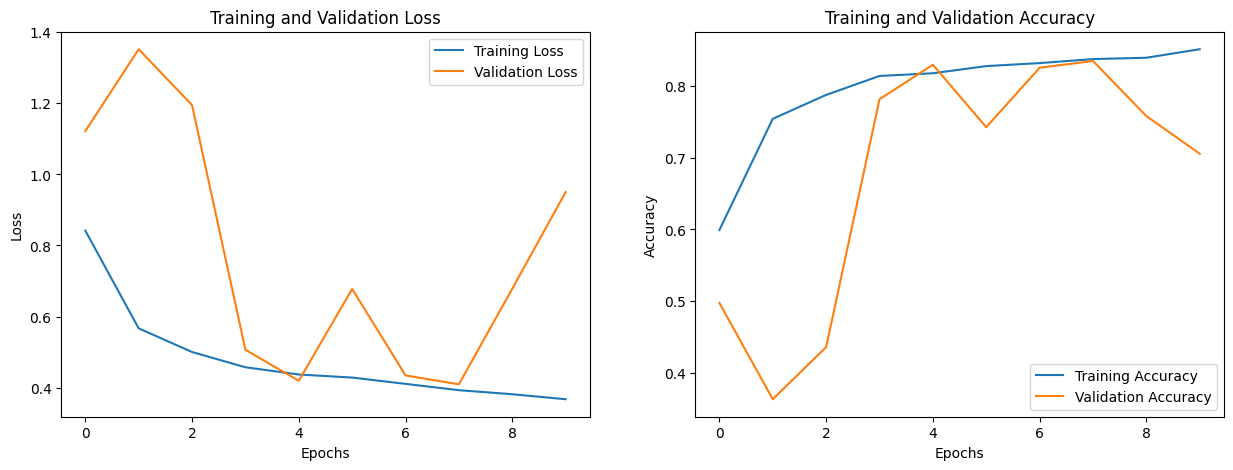

In [18]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # 1行2列，图形大小15x5

# 绘制训练和验证的损失值曲线
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 绘制训练和验证的准确率曲线
ax2.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [20]:
model240_S1U.save_weights('model240_S1U.weights.h5')


In [21]:

size = len(train_data_files) // 100
steps_per_epoch = size // batch_size
validation_steps = size // batch_size

history2 = model240_S1U.fit(data_generator(train_data_files[size:(size*2)], train_label_files[size:(size*2)], batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=data_generator(val_data_files[size:(size*2)], val_label_files[size:(size*2)], batch_size),
    validation_steps=validation_steps)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step - loss: 0.4516 - sparse_categorical_accuracy: 0.8224 - val_loss: 0.3634 - val_sparse_categorical_accuracy: 0.8562
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - loss: 0.4115 - sparse_categorical_accuracy: 0.8299 - val_loss: 0.3668 - val_sparse_categorical_accuracy: 0.8535
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - loss: 0.3919 - sparse_categorical_accuracy: 0.8361 - val_loss: 0.3812 - val_sparse_categorical_accuracy: 0.8485
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - loss: 0.3683 - sparse_categorical_accuracy: 0.8438 - val_loss: 0.3721 - val_sparse_categorical_accuracy: 0.8467
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - loss: 0.3674 - sparse_categorical_accuracy: 0.8495 - val_loss: 0.4606 - val_sparse_categorical_accuracy: 0.8117
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - loss: 0.3662 - sparse_categorical_accuracy: 0.8432 - val_loss: 0.4425 - val_sparse_categorical_acc

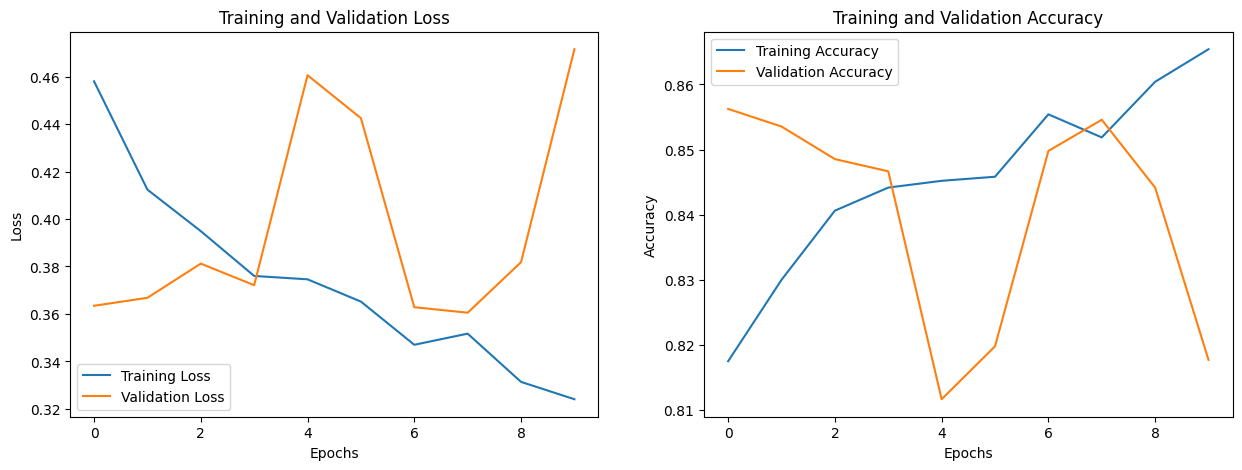

In [22]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # 1行2列，图形大小15x5

# 绘制训练和验证的损失值曲线
ax1.plot(history2.history['loss'], label='Training Loss')
ax1.plot(history2.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 绘制训练和验证的准确率曲线
ax2.plot(history2.history['sparse_categorical_accuracy'], label='Training Accuracy')
ax2.plot(history2.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [25]:
model_S1U = get_dl_model_240()
model_S1U.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=[SparseCategoricalAccuracy()])
model_S1U.load_weights('dl_model/len_240/S1U/best_weights_clas.h5')

In [26]:

size = len(train_data_files) // 100
steps_per_epoch = size // batch_size
validation_steps = size // batch_size

history3 = model_S1U.fit(data_generator(train_data_files[:size], train_label_files[:size], batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=data_generator(val_data_files[:size], val_label_files[:size], batch_size),
    validation_steps=validation_steps)

Epoch 1/10


E0000 00:00:1737408380.507456  810924 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_9_1/dropout_81_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 149ms/step - loss: 0.2941 - sparse_categorical_accuracy: 0.8797 - val_loss: 0.3612 - val_sparse_categorical_accuracy: 0.8490
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - loss: 0.2553 - sparse_categorical_accuracy: 0.8869 - val_loss: 0.2911 - val_sparse_categorical_accuracy: 0.8821
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - loss: 0.2414 - sparse_categorical_accuracy: 0.9026 - val_loss: 0.2521 - val_sparse_categorical_accuracy: 0.8942
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - loss: 0.2246 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.2525 - val_sparse_categorical_accuracy: 0.8938
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - loss: 0.2107 - sparse_categorical_accuracy: 0.9088 - val_loss: 0.2506 - val_sparse_categorical_accuracy: 0.8935
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - loss: 0.1940 - sparse_categorical_accuracy: 0.9163 - val_loss: 0.2530 - val_sparse_categorical_accuracy: 0.89

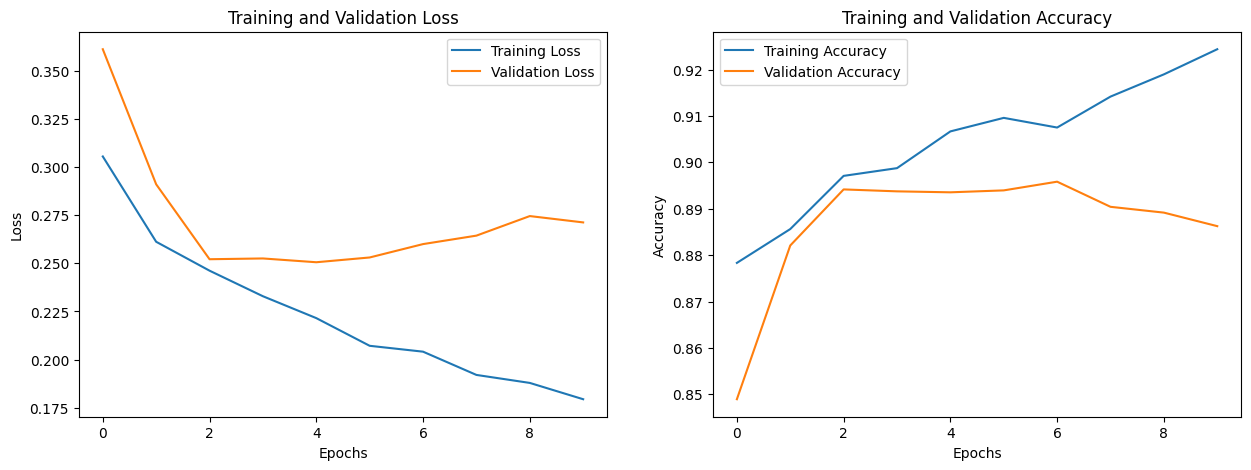

In [27]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # 1行2列，图形大小15x5

# 绘制训练和验证的损失值曲线
ax1.plot(history3.history['loss'], label='Training Loss')
ax1.plot(history3.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 绘制训练和验证的准确率曲线
ax2.plot(history3.history['sparse_categorical_accuracy'], label='Training Accuracy')
ax2.plot(history3.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [28]:
size = len(train_data_files)
steps_per_epoch = size // batch_size
validation_steps = size // batch_size

history4 = model_S1U.fit(data_generator(train_data_files[:size], train_label_files[:size], batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=data_generator(val_data_files[:size], val_label_files[:size], batch_size),
    validation_steps=validation_steps)

Epoch 1/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 2325s 155ms/step - loss: 0.2701 - sparse_categorical_accuracy: 0.8873 - val_loss: 0.2403 - val_sparse_categorical_accuracy: 0.8963
Epoch 2/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 2326s 155ms/step - loss: 0.2648 - sparse_categorical_accuracy: 0.8882 - val_loss: 0.2418 - val_sparse_categorical_accuracy: 0.8958
Epoch 3/10
13946/15000 ━━━━━━━━━━━━━━━━━━━━ 2:09 123ms/step - loss: 0.2611 - sparse_categorical_accuracy: 0.8896

KeyboardInterrupt: 

NameError: name 'history4' is not defined

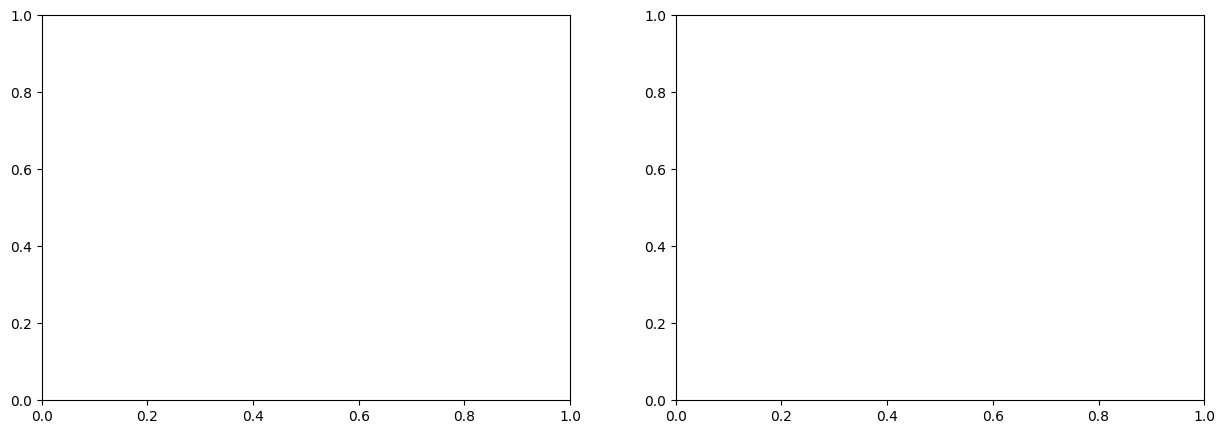

In [29]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # 1行2列，图形大小15x5

# 绘制训练和验证的损失值曲线
ax1.plot(history4.history['loss'], label='Training Loss')
ax1.plot(history4.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 绘制训练和验证的准确率曲线
ax2.plot(history4.history['sparse_categorical_accuracy'], label='Training Accuracy')
ax2.plot(history4.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()